In [2]:
from scipy import misc
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = plt.imread('../datasets_raw/csgo/test_1.jpg')

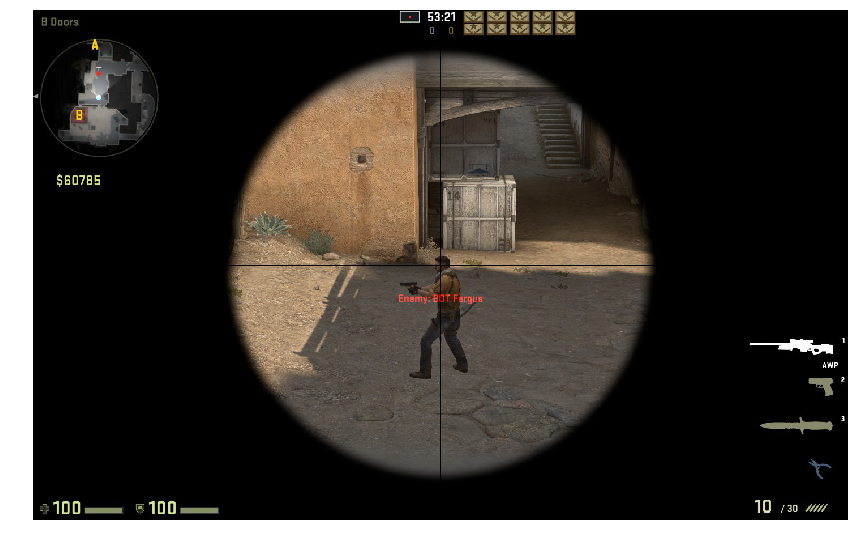

In [4]:
plt.figure(figsize=(15, 9.37))
plt.axis('off')
plt.imshow(image)

In [13]:
(900/1440.0) * 15

9.375

In [5]:
h, w, _ = image.shape

In [6]:
sh = int(h * 0.55)
sw = sh

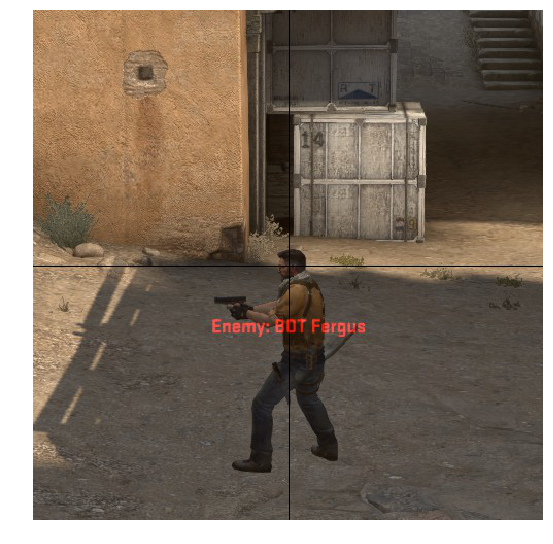

In [7]:
plt.figure(figsize=(15, 9.37))
plt.axis('off')
plt.imshow(image[(h - sh)/2:(h + sh)/2, (w - sw)/2:(w + sw)/2, :])

In [8]:
image_5 = plt.imread('../datasets_raw/csgo/test_5.jpg')
image_4 = plt.imread('../datasets_raw/csgo/test_4.jpg')

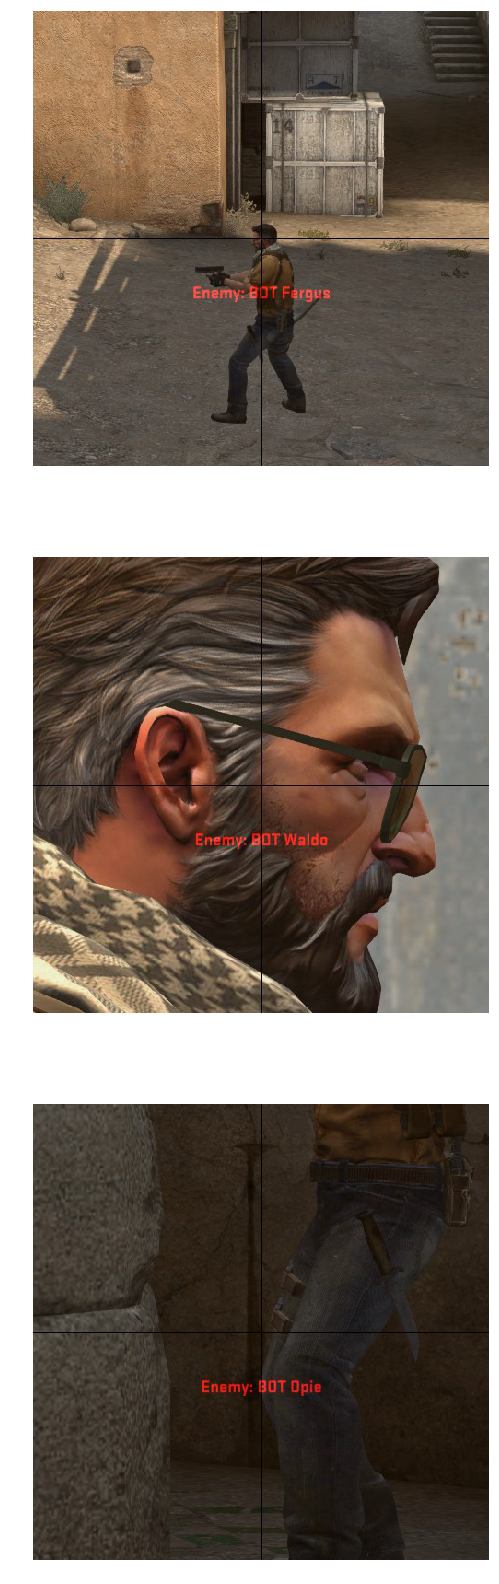

In [9]:
#plt.figure(figsize=(15, 9.37))
#plt.axis('off')
images = [image, image_5, image_4]
f,axis = plt.subplots(len(images), 1, figsize=(15, 9.5 * len(images)))

for ax, img in zip(axis, images):
    ax.axis('off')
    ax.imshow(img[(h - sh)/2:(h + sh)/2, (w - sw)/2:(w + sw)/2, :])

In [10]:
from skimage.transform import rescale, resize

In [11]:
def tn(image, sh, sw):
    h, w, _ = image.shape
    return image[(h - sh)/2:(h + sh)/2, (w - sw)/2:(w + sw)/2, :]

# (224, 192, 160, 128)

/home/kuddai/Documents/ML/cheats/local/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


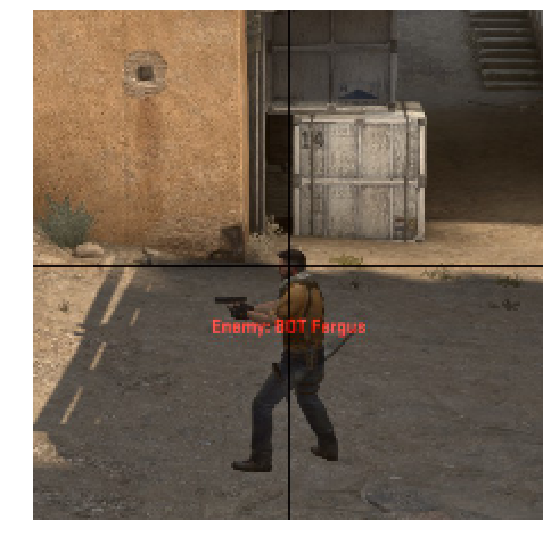

In [12]:
image_224_1 = resize(tn(image, sh, sw), (224, 224))
plt.figure(figsize=(15, 9.37))
plt.axis('off')
plt.imshow(image_224_1)

In [13]:
image_128_1 = resize(tn(image, sh, sw), (128, 128))
plt.figure(figsize=(15, 9.37))
plt.axis('off')
plt.imshow(image_128_1)

In [14]:
image_128_5 = resize(tn(image_5, sh, sw), (128, 128))
plt.figure(figsize=(15, 9.37))
plt.axis('off')
plt.imshow(image_128_5)

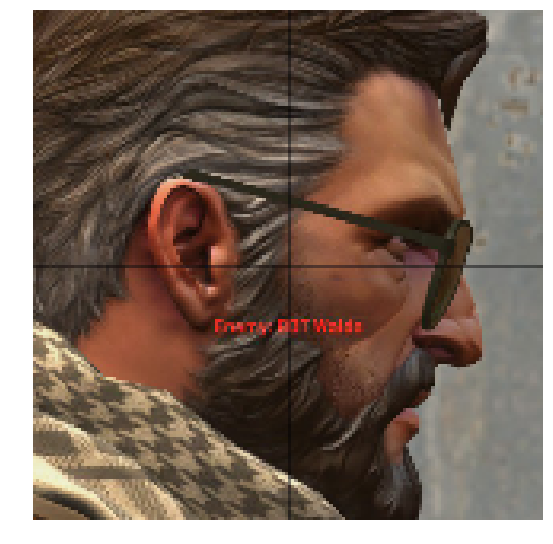

In [15]:
image_160_5 = resize(tn(image_5, sh, sw), (160, 160))
plt.figure(figsize=(15, 9.37))
plt.axis('off')
plt.imshow(image_160_5)

In [16]:
sw

495

In [17]:
from skimage.color import rgb2gray

In [18]:
plt.figure(figsize=(15, 9.37))
plt.axis('off')
plt.imshow(rgb2gray(image_160_5), cmap="gray")

In [19]:
hit = os.listdir('../datasets_raw/csgo/hit/1screen')
miss = os.listdir('../datasets_raw/csgo/miss/1screen')

In [20]:
from random import shuffle, seed
seed(42)

In [21]:
def split(arr):
    shuffle(arr)
    return np.split(arr, [int(.8 * len(arr)), int(.9 * len(arr))])

In [22]:
print os.path.join('../datasets_raw/csgo/', 'hit', '1screen', 'aaa')

../datasets_raw/csgo/hit/1screen/aaa


In [23]:
def tn(image):
    h, w, _ = image.shape
    return image[(h - sh)/2:(h + sh)/2, (w - sw)/2:(w + sw)/2, :]

In [24]:
def create(label, tf, data):
    train, valid, test = split(data)

    train_dir = os.path.join('../datasets/csgo/train', label)
    valid_dir = os.path.join('../datasets/csgo/valid', label)
    test_dir = os.path.join('../datasets/csgo/test', label)
    
    chain = [(train, train_dir), (valid, valid_dir), (test, test_dir)]

    for names, dst_path in chain:
        try:
            os.makedirs(dst_path)
        except OSError:
            print dst_path, 'exist'
        
        for name in names:
            src = os.path.join('../datasets_raw/csgo/', label, '1screen', name)
            dst = os.path.join(dst_path, name.split('.')[0] + '.png')

            try:
                img = plt.imread(src)
                plt.imsave(dst, tf(img), format='png')
            except IOError:
                print 'IOError for', src, dst

In [117]:
create('hit', tn, hit)

IOError for ../datasets_raw/csgo/hit/1screen/.DS_Store ../datasets/csgo/train/hit/.png


In [25]:
create('miss', tn, miss)

IOError for ../datasets_raw/csgo/miss/1screen/.DS_Store ../datasets/csgo/train/miss/.png


20180113000505_1.jpg
20180112235513_1.jpg
